In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('Data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df.shape

(1000, 8)

1) Checking missing values

In [21]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing value 

2) Check duplicates

In [22]:
df.duplicated().sum()

0

There is no duplicates

3) Check data types

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


4) Checking unique values

In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

5) Check statistics of the data set

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
1. The mean score(btwn 66 & 68) along with the standard deviation(btwn 14.6 & 15.19) of all the three sections are extremely close.
2. Maths is the only section with min score as low as 0.

Exploring Data

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
print("gender: unique:",df['gender'].unique())
print("race/ethnicity: unique:",df['race/ethnicity'].unique())
print("parental level of education: unique:",df['parental level of education'].unique())
print("lunch: unique:",df['lunch'].unique())
print("test preparation course: unique:",df['test preparation course'].unique())


gender: unique: ['female' 'male']
race/ethnicity: unique: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: unique: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: unique: ['standard' 'free/reduced']
test preparation course: unique: ['none' 'completed']


In [28]:
#numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print ("No. of numerical featrues :{} - {} ".format(len(numerical_features),numerical_features))
print ("\nNo. of categorical featrues :{} - {} ".format(len(categorical_features),categorical_features))

No. of numerical featrues :3 - ['math score', 'reading score', 'writing score'] 

No. of categorical featrues :5 - ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


Calculating Total Score and Average Score

In [29]:
df['total score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total score']/3

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full = df[df['reading score']== 100]['average'].count()
math_full = df[df['math score']== 100]['average'].count()
writing_full = df[df['writing score']== 100]['average'].count()

print(f'No. of student with full marks in reading: {reading_full}')
print(f'No. of student with full marks in math: {math_full}')
print(f'No. of student with full marks in writing: {writing_full}')

No. of student with full marks in reading: 17
No. of student with full marks in math: 7
No. of student with full marks in writing: 14


In [32]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()

print(f'No. of student with less than 20 marks in reading: {reading_less_20}')
print(f'No. of student with less than 20 marks in math: {math_less_20}')
print(f'No. of student with less than 20 marks in writing: {writing_less_20}')


No. of student with less than 20 marks in reading: 1
No. of student with less than 20 marks in math: 4
No. of student with less than 20 marks in writing: 3


Observations : Students have performed worst in maths whereas best in the reading section

Data Visualization

1. Histograms 

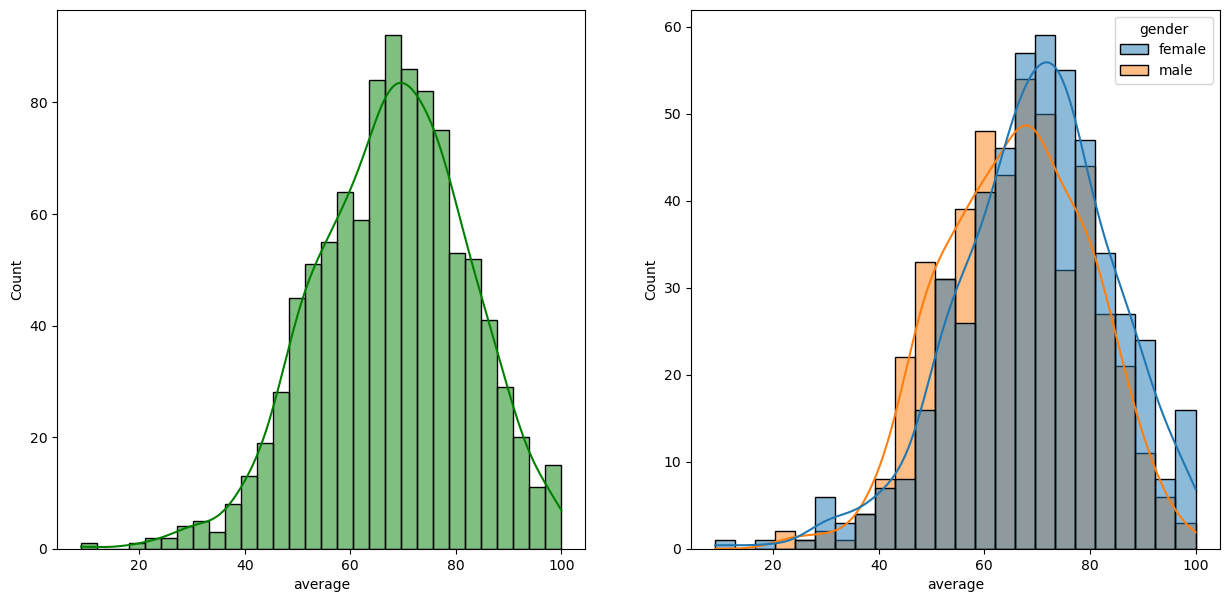

In [33]:
fig, axs = plt.subplots(1,2 , figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df, x='average',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data = df, x='average',kde=True, hue='gender')
plt.show()

- Females have a higher average score than males above 60 marks avg 
- whereas males have a higher average score than females below 60 marks avg

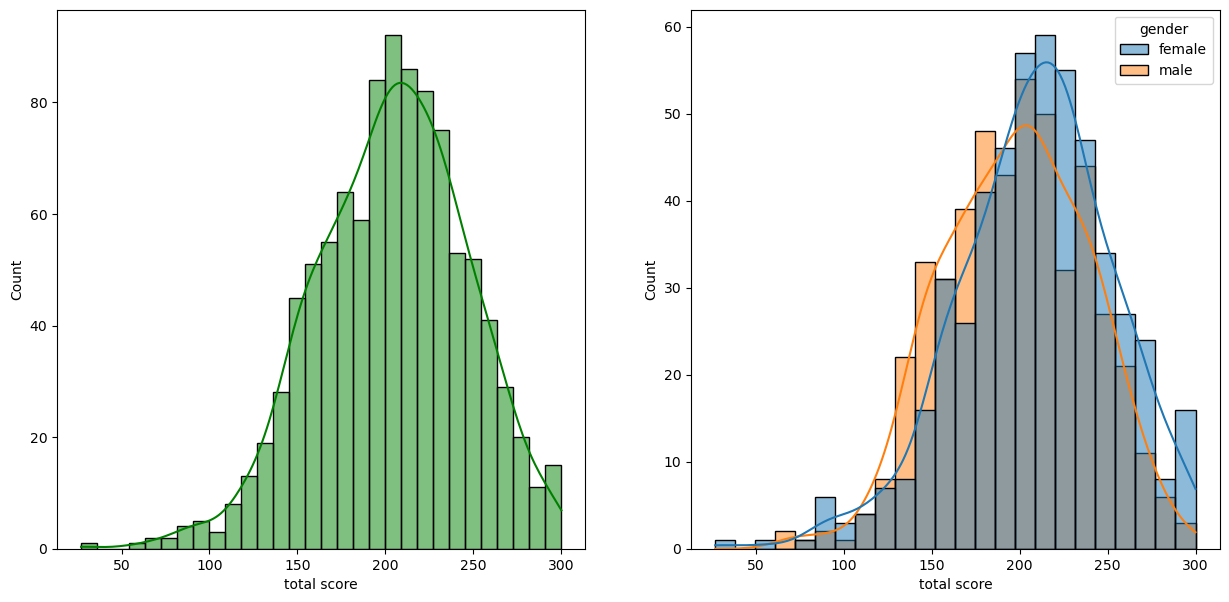

In [34]:
fig, axs = plt.subplots(1,2 , figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df, x='total score',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data = df, x='total score',kde=True, hue='gender')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

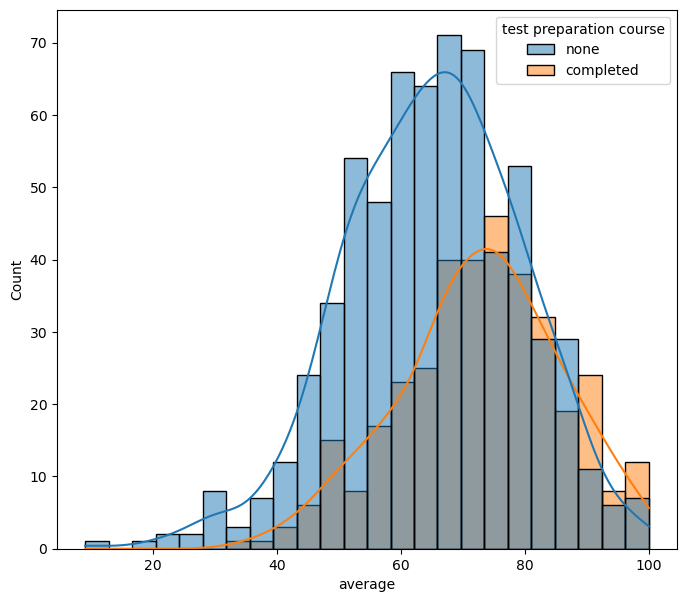

In [35]:
fig, axs = plt.subplots(figsize =(8,7))
sns.histplot(data = df , x='average',kde = True, hue='test preparation course')


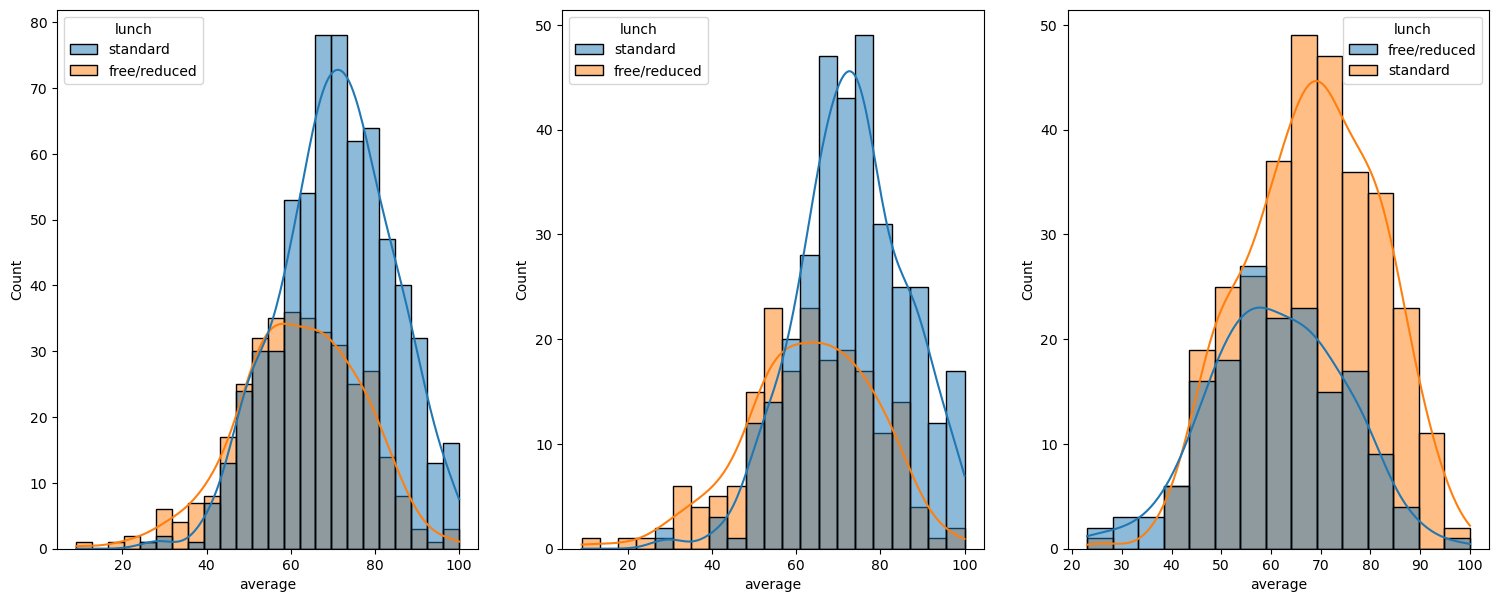

In [36]:
fig, axs = plt.subplots(1,3 , figsize =(25,7))
plt.subplot(141)
sns.histplot(data = df, x='average',kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data = df[df['gender']=='female'],  x='average',kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data = df[df['gender']=='male'],  x='average',kde=True, hue='lunch')
plt.show()

- Standard lunch helps to score better in exams be it male or female.

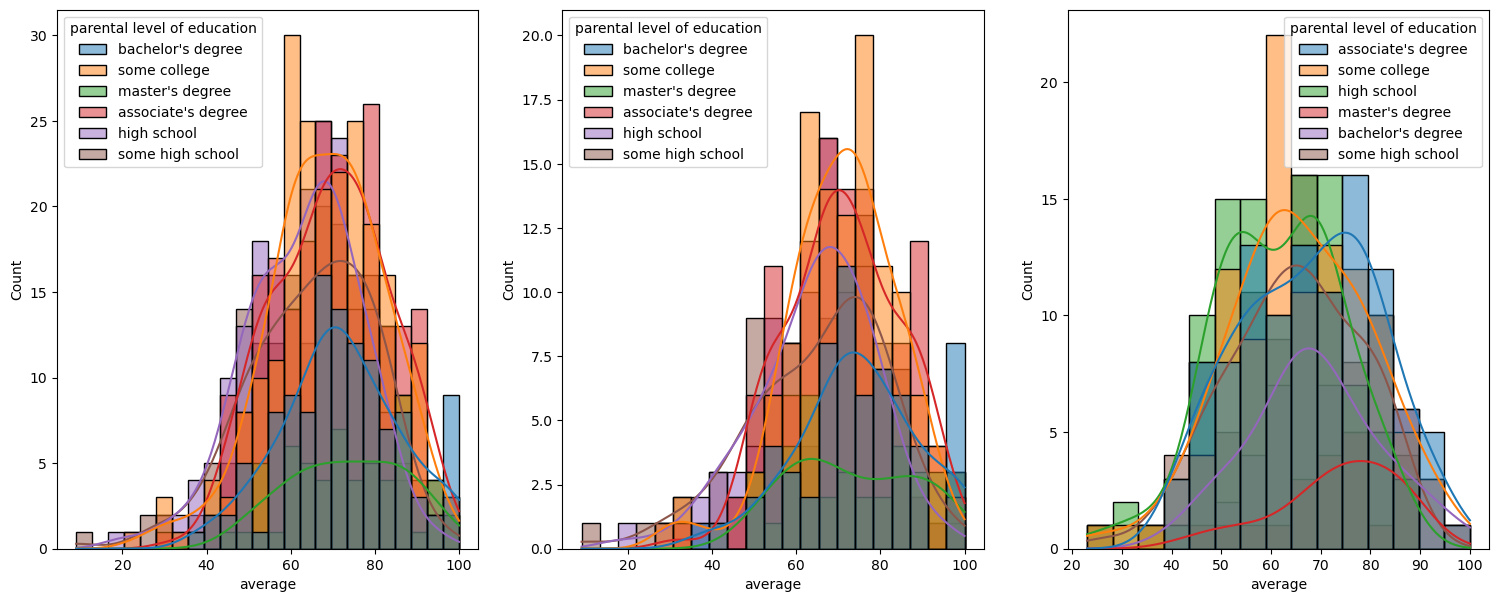

In [37]:
fig, axs = plt.subplots(1,3 , figsize =(25,7))
plt.subplot(141)
sns.histplot(data = df, x='average',kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data = df[df['gender']=='female'],  x='average',kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data = df[df['gender']=='male'],  x='average',kde=True, hue='parental level of education')
plt.show()

- In general, parents do not play any signnificant role in the students performance.

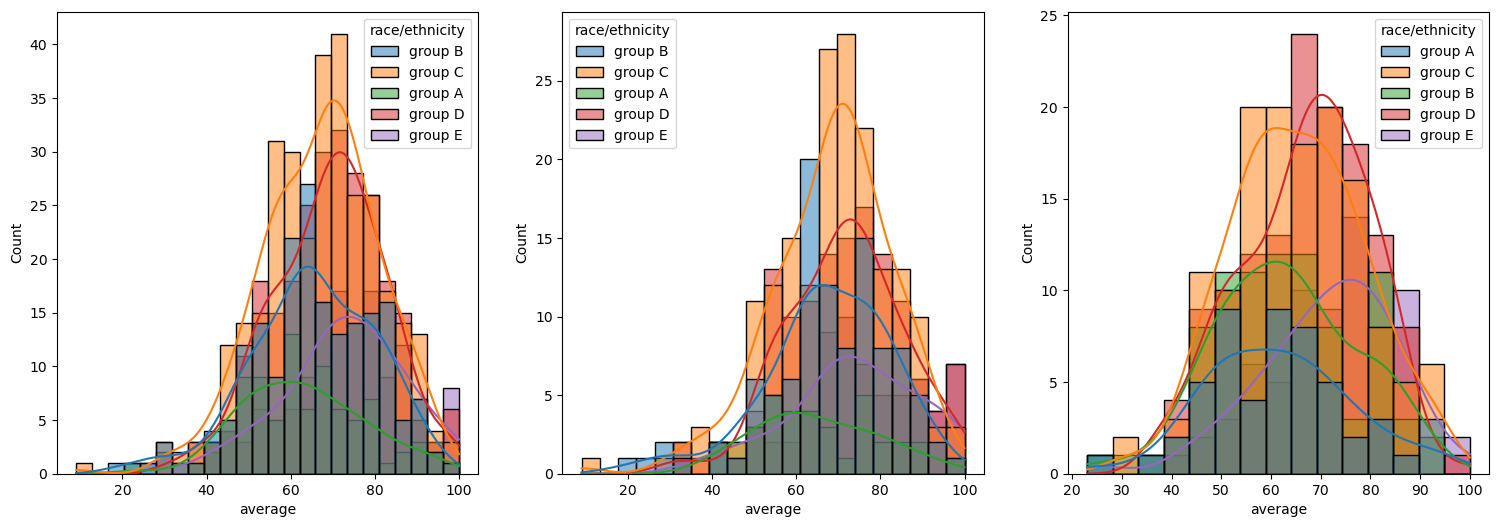

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Maximum score of students in all three subjects

<Axes: title={'center': 'Writing Score'}, ylabel='writing score'>

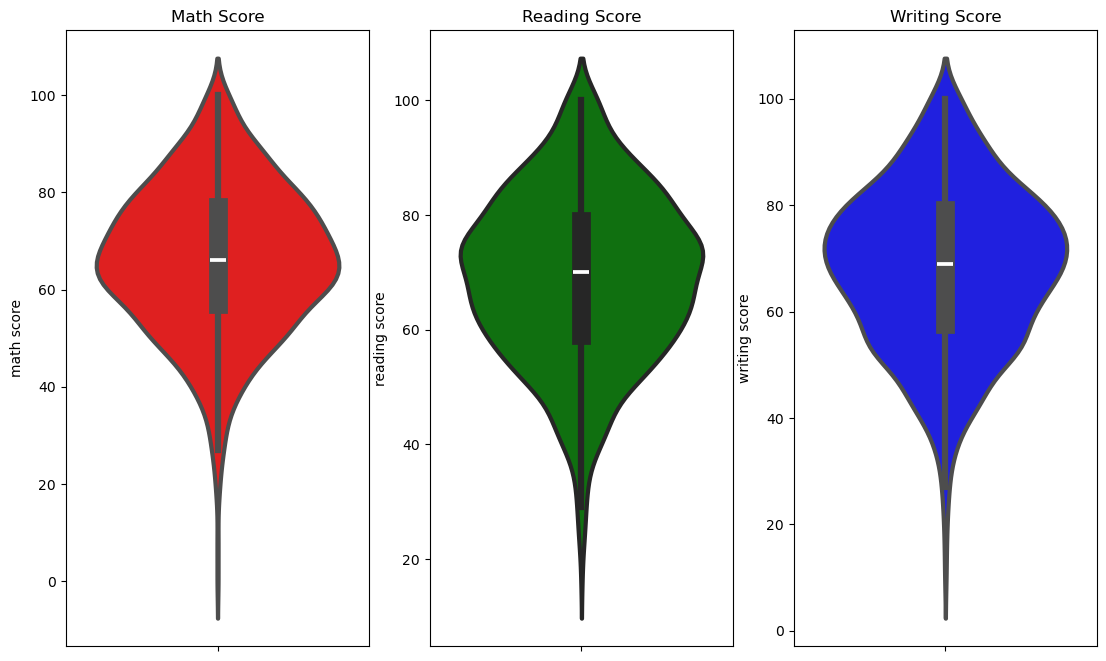

In [39]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math Score")
sns.violinplot(y='math score', data=df, color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Score")
sns.violinplot(y='reading score', data=df, color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Score")
sns.violinplot(y='writing score', data=df, color='blue',linewidth=3)


- From the above plots its clearly visible most students score in between 60 & 80 in maths whereas,in reading and writing they score in between 50 & 80